In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
import sys

sns.set_theme(style="whitegrid")

In [2]:
model = make_pipeline(
    ColumnTransformer([
        # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['age', 'fav_drink', 'Gender', 'taste', 'pref_roast']),
    ], remainder='passthrough'), 
    RandomForestClassifier(
        n_estimators=80,
        max_depth=6,
        random_state=42,
        min_samples_leaf=5)
)

In [22]:
df = pd.read_csv('data/coffee_cleaned.csv', index_col='Submission ID')

# rebalence data because more 1s than 0s
low = df[df['most_expensive_purchase_cat'] == 0]
high = df[df['most_expensive_purchase_cat'] == 1].sample(n=low.shape[0])
balanced_df = pd.concat([low, high])

balanced_df = balanced_df.dropna(subset=['most_expensive_purchase_cat', 'age', 'Gender', 'fav_drink', 'taste', 'pref_roast'])
X = balanced_df[['age', 'fav_drink', 'Gender', 'taste', 'pref_roast', 'whole_milk', 'skim_milk', 'half_and_half', 'creamer', 
        'flav_creamer', 'oat_milk', 'almond_milk', 'soy_milk', 'other_dairy', 'sugar', 'art_sweet', 'honey', 'maple_syrup', 
        'stevia', 'agave_nectar', 'brown_sugar',  'raw_sugar']]
y = balanced_df[['most_expensive_purchase_cat']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))

0.6548672566371682
0.6022727272727273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


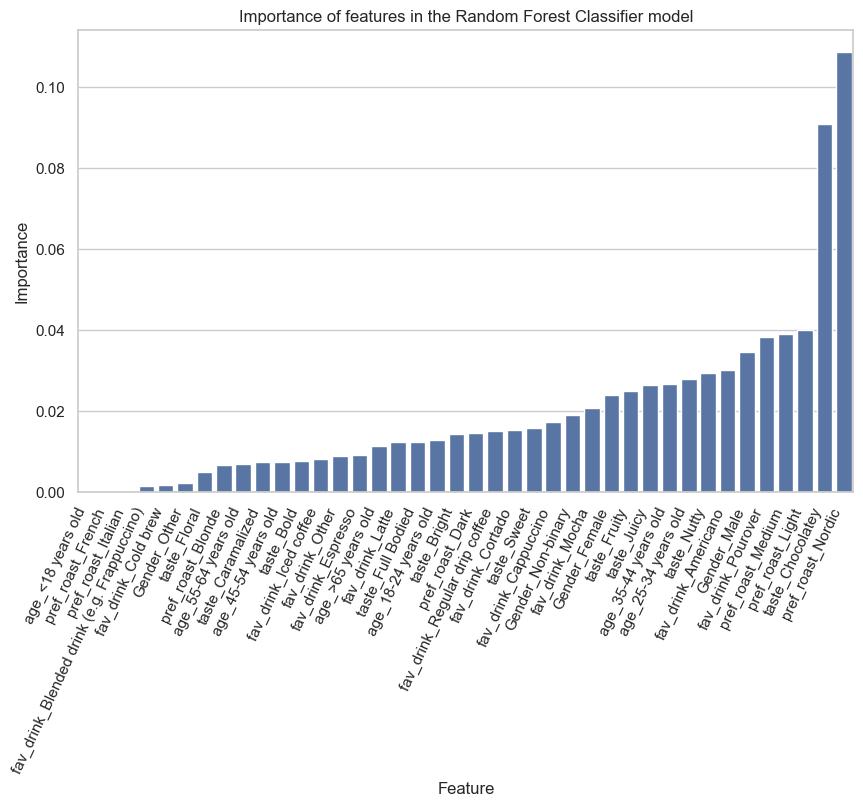

In [32]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

# onehot columns -> https://yannawut.medium.com/get-column-name-after-fitting-the-machine-learning-pipeline-145a2a8051cc\
# and https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out
cat_cols = ['age', 'fav_drink', 'Gender', 'taste', 'pref_roast']
new_cat_cols = model.named_steps["columntransformer"].named_transformers_["onehot"].get_feature_names_out(cat_cols)

# graph importance -> https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(new_cat_cols, model.steps[1][1].feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'}).reset_index()
importances = importances.sort_values('importance')

plt.figure(figsize=(10, 6))
plt.title('Importance of features in the Random Forest Classifier model')
plt.xticks(rotation=65, ha='right')
plt.ylabel('Importance')
plt.xlabel('Feature')
sns.barplot(importances, x='index', y='importance')
plt.show()

In [33]:
test = balanced_df.groupby('most_expensive_purchase_cat').agg({'Gender': 'count'})

In [34]:
test

,Gender
most_expensive_purchase_cat,
0.0,526
1.0,529
